#### Predizioni e Confusion Matrix per modello LightGBM tuned

In [16]:
import gc
import pickle

import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

import lightgbm as lgb

In [4]:
loaded_model = pickle.load(open("./model-files/model.pkl", "rb"))

In [5]:
orig_train = pd.read_parquet("train_augmented.parquet")

In [6]:
TARGET = 'is_attributed'

# train, validation split
TRAIN_FRAC = 0.98

N_TRAIN = int(orig_train.shape[0] * TRAIN_FRAC)

# shuffle
orig_train = orig_train.sample(frac=1.)

df_train = orig_train[:N_TRAIN]
df_valid = orig_train[N_TRAIN:]

print('Original training samples:', df_train.shape[0])
print('Num. validation samples:', df_valid.shape[0])

Original training samples: 181205812
Num. validation samples: 3698078


In [7]:
feat = ['ip', 'app', 'device', 'os', 'channel',
       'hour', 'day', 'ip_app_channel_var_day', 'qty', 'ip_app_count',
       'qty_var', 'ip_app_os_count', 'ip_app_os_var',
       'ip_app_channel_mean_hour']

# removed ip because it is high cardinality
cat_feat = ['app', 'device', 'os', 'channel']

x_train = df_train[feat]
y_train = df_train[TARGET]

x_valid = df_valid[feat]
y_valid = df_valid[TARGET]

In [8]:
y_pred = loaded_model.predict_proba(x_valid)

In [9]:
y_pred = y_pred[:, 1]

In [15]:
print('ROC computed with LightGBM best mdeo is:', round(roc_auc_score(y_valid, y_pred), 4))

ROC computed with LightGBM best mdeo is: 0.979


In [12]:
y_pred_labels = loaded_model.predict(x_valid)

In [18]:
cm = confusion_matrix(y_valid, y_pred_labels)

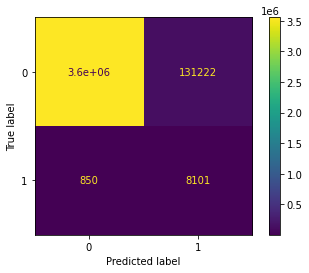

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()